# Reviews

In [1]:
import pandas as pd
df = pd.read_csv("amazon_baby.csv")

In [2]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [3]:
def searchBar(df,wordsearch):
    listReview = []
    counter = 0
    listOfReviews = df['review'].tolist()
    for review in listOfReviews:
        if wordsearch in str(review):
            counter = counter + 1
    return counter

# WordCloud

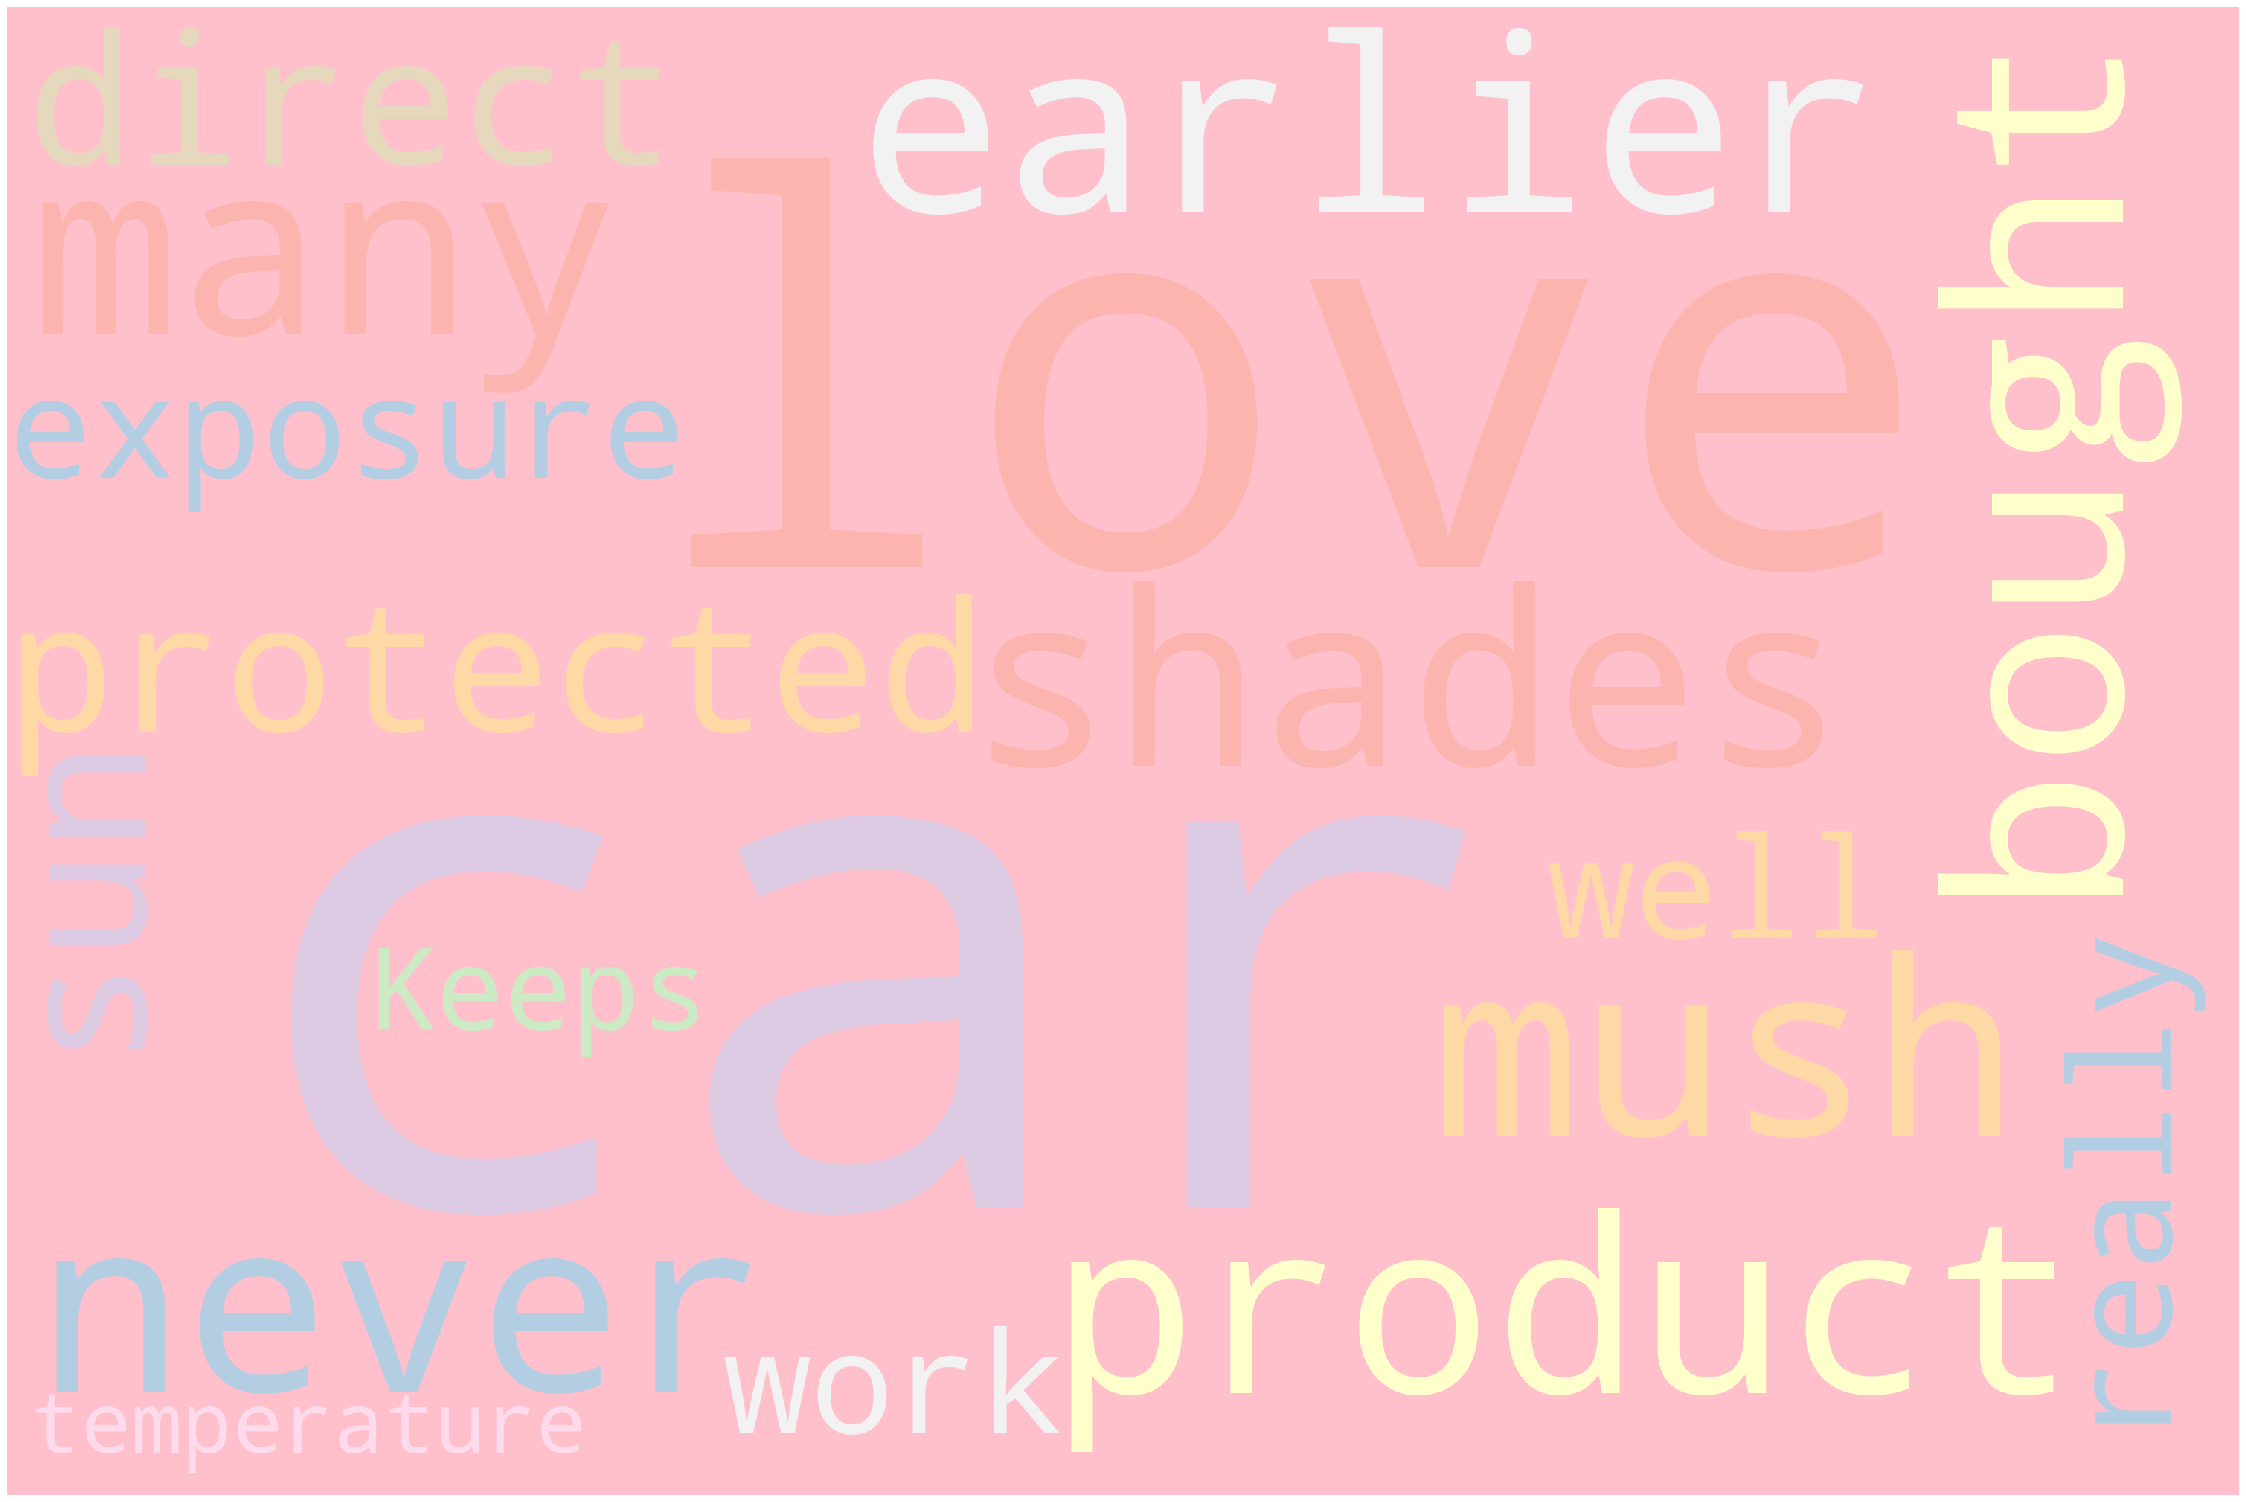

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


lista = []
listOfReviews = df['review'].tolist()
for text in listOfReviews:
    lista.append(str(text))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='pink', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
plt.axis("off")
plt.imshow(wordcloud) 

In [5]:
searchBar(df,'car')

29249

In [6]:
searchBar(df,'love')

50965

In [7]:
searchBar(df,'work')

31366

# Clean Data

In [8]:
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')

def cleanStopw(stops):
    newstops = []
    for s in stops:
        if len(s) > 2:
            newstops.append(s)
    return newstops

stops = cleanStopw(stops)

def cleanData(stops,lista):
    cleanlist = []
    for review in lista:
        temp = nltk.word_tokenize(review)
        for words in stops:
            if words in temp:
                review = review.replace(words,'')
            else:
                continue
        cleanlist.append(review)
    return cleanlist

In [9]:
clean = cleanData(stops,lista)

In [14]:
import re
def clearSymbols(clean):
    for i in range(0,len(clean)-1):
        temp = re.sub(r'[^\w]', ' ', clean[i])
        clean[i] = temp
    return clean
clean = clearSymbols(clean)

# Bag of Words

We are going to create a bag of words model from scratch. 

1) Firstly, we are going to pick the 30 most common words in the text.

2) Secondly, we will count the appearances of these words in all the documents that we have, in order to create the vectors.

3) Finally, a matrix will be created.

In [21]:
from nltk import FreqDist

def createDictionary(clean):
    tokens_all = []
    for c in clean:
        temp = nltk.word_tokenize(c)
        for t in temp:
            if len(t) > 2:
                tokens_all.append(t)
    return tokens_all
clean = createDictionary(clean)
freq_dist_pos = FreqDist(clean)
print(freq_dist_pos.most_common(20))

[('The', 90856), ('baby', 74176), ('one', 72406), ('would', 54494), ('use', 52574), ('great', 50383), ('like', 50353), ('This', 43114), ('seat', 42911), ('little', 40979), ('get', 40732), ('old', 39294), ('easy', 36696), ('well', 36060), ('love', 34812), ('time', 33243), ('product', 33238), ('son', 31951), ('bought', 29375), ('much', 28613)]


In [23]:
print(freq_dist_pos.most_common(30))

[('The', 90856), ('baby', 74176), ('one', 72406), ('would', 54494), ('use', 52574), ('great', 50383), ('like', 50353), ('This', 43114), ('seat', 42911), ('little', 40979), ('get', 40732), ('old', 39294), ('easy', 36696), ('well', 36060), ('love', 34812), ('time', 33243), ('product', 33238), ('son', 31951), ('bought', 29375), ('much', 28613), ('daughter', 27344), ('also', 27148), ('good', 26874), ('put', 26802), ('months', 26006), ('don', 25651), ('stroller', 25650), ('back', 25569), ('used', 23364), ('car', 23140)]


In [34]:
def fillcommon(common):
    fill = []
    for i in range(0,len(common)-1):
        fill.append(common[i][0])
    return fill
common = fillcommon(freq_dist_pos.most_common(30))
def formVector(common,clean,i):
    vector = []
    temp = nltk.word_tokenize(clean[i])
    for i in common:
        count = temp.count(i)
        vector.append(count)
    return vector


In [35]:
matrix = []
for i in range(0,len(clean)-1):
    sentence_vec = formVector(common,clean,i)
    matrix.append(sentence_vec)

In [38]:
import numpy as np
matrix = np.array(matrix)
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])